# <center>CONSTITUTION DU DATASET</center> #

## <font color='#5BA69E'>INTRODUCTION</font> ##

Le jeu de données du projet French Industry est composé de données publiées par l'INSEE, réparties sur 4 tables :

- géographie
- démographie des entreprises
- salaires
- populations.

Le lien entre ces 4 tables est le code géographique communale de l'INSEE. Code à partir duquel on peut déterminer la localisation gps ainsi que toutes les appartenances à des zones administratives (régions, départements, etc.)

Datant de 2014, le jeu a été réactualisé par nos soins avec des données publiées en 2020, dernière année pour laquelle nous pouvions regrouper l'ensemble des variables à l'indentique. Nous l'avons également considérablement élargi avec de nombreuses variables et les tables ont été rassemblées sur fichier unique.

Le jeu de données 2020 porte sur près de 35.000 communes. 

## <font color='#5BA69E'>IMPORT DES LIBRAIRIES</font> ##

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#élargissement de la visualisation des tableaux pandas
pd.set_option('display.max_columns', None)

#suppression des warnings
import warnings
warnings.filterwarnings('ignore')

## <font color='#5BA69E'>CHARTE GRAPHIQUE</font> ##

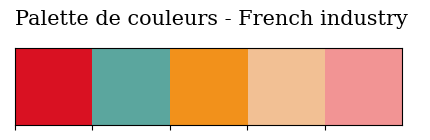

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.palplot(["#D91122", "#5BA69E", "#F2911B", "#F2C094", "#F29494"])
plt.title("Palette de couleurs - French industry  ",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

## <font color='#5BA69E'>IMPORT DU DATASET 2020</font> ##

In [44]:
df = pd.read_csv('all_content_2020_v5.csv', index_col='CODGEO',dtype={'CODGEO': 'string', 'REG':'string', 'DEP':'string'})

In [45]:
#suppression colonne unamed 0
df = df.iloc[:,1:]
df.head()

EU_circo  num_region num_dep              nom_commune nom_dep  \
CODGEO                                                                 
01001   Sud-Est          84       1  L'Abergement-Clémenciat     Ain   
01002   Sud-Est          84       1    L'Abergement-de-Varey     Ain   
01004   Sud-Est          84       1        Ambérieu-en-Bugey     Ain   
01005   Sud-Est          84       1      Ambérieux-en-Dombes     Ain   
01006   Sud-Est          84       1                  Ambléon     Ain   

                  nom_region num_chef_lieu nom_chef_lieu  code_postal  \
CODGEO                                                                  
01001   Auvergne-Rhône-Alpes         69123          Lyon       1400.0   
01002   Auvergne-Rhône-Alpes         69123          Lyon       1640.0   
01004   Auvergne-Rhône-Alpes         69123          Lyon       1500.0   
01005   Auvergne-Rhône-Alpes         69123          Lyon       1330.0   
01006   Auvergne-Rhône-Alpes         69123          Lyon       1300.0   

         latitude  longitude  pop_tot  SUPERF  P19_POP  P19_POP1529  \
CODGEO                                                                
01001   46.153721   4.925850      821   15.95    779.0   102.468339   
01002   46.009606   5.428088      268    9.15    256.0    29.609476   
01004   45.961049   5.372275    14662   24.60  14134.0  3076.783602   
01005   45.996164   4.911967     1806   15.92   1751.0   268.250842   
01006   45.749886   5.594585      113    5.88    112.0    16.290909   

        P19_POP3044  P19_POP4559  P19_POP6074  P19_POP7589  P19_POP90P  \
CODGEO                                                                   
01001    131.523972   194.112147   131.050309    56.014471    5.322133   
01002     74.028483    38.684019    35.381928    17.582020    2.067723   
01004   2730.398468  2391.347109  2054.139468  1044.007592  195.156716   
01005    362.580808   380.267677   272.181257   111.034231    9.826038   
01006     15.272727    29.527273    27.490909    10.181818    1.018182   

           P19_POPH    P19_H1529    P19_H3044    P19_H4559   P19_H6074  \
CODGEO                                                                   
01001    397.885214    55.349857    64.994670   101.534491   63.896432   
01002    129.517516    10.625566    40.128975    17.749378   22.886171   
01004   6790.643609  1565.330686  1390.794511  1181.166729  865.242858   
01005    877.465208   133.634119   173.920875   191.607744  141.494949   
01006     63.127273    12.218182     9.163636    17.309091   12.218182   

         P19_H7589   P19_H90P    P19_H0019    P19_H2064    P19_H65P  \
CODGEO                                                                
01001    27.368282   2.093854   111.532013   209.661898   76.691304   
01002     9.323880   1.040237    32.108560    69.372763   28.036193   
01004   392.038514  50.487631  1880.614476  3963.888422  946.140710   
01005    52.078002   2.947811   225.998878   513.901796  137.564534   
01006     4.072727   0.000000    11.200000    39.709091   12.218182   

           P19_POPF    P19_F1529    P19_F3044    P19_F4559    P19_F6074  \
CODGEO                                                                    
01001    381.114786    47.118481    66.529301    92.577655    67.153877   
01002    126.482484    18.983910    33.899508    20.934641    12.495757   
01004   7343.356391  1511.452917  1339.603957  1210.180380  1188.896610   
01005    873.534792   134.616723   188.659933   188.659933   130.686308   
01006     48.872727     4.072727     6.109091    12.218182    15.272727   

         P19_F7589    P19_F90P    P19_F0019    P19_F2064     P19_F65P  \
CODGEO                                                                  
01001    28.646189    3.228280    97.697600   209.461476    73.955710   
01002     8.258140    1.027486    38.307515    70.567446    17.607524   
01004   651.969078  144.669086  1805.002426  4011.900451  1526.453514   
01005    58.956229    6.878227   209.294613   518.814815   145.42

De nombreuses désignations de variables sont codifiées par l'INSEE.  

Afin de pouvoir se répérer au sein de ces variables, il est nécessaire de se référer à un fichier descriptif.

[Lien vers le fichier descriptif](https://docs.google.com/spreadsheets/d/1m9MQoDUwLlo7mqlWtpj2xH0xIk5q_Y4pvI-ZFEC5eHo/edit?usp=sharing)

On importe également ce même fichier au format csv pour une utilisation ultérieure.

In [46]:
df_descr = pd.read_csv('description_variables.csv', sep=';', dtype={'CODVAR': 'string'})

In [47]:
df_descr = df_descr.iloc[:,:-2] #suprresion des deux dernières colonnes (vides)
df_descr.head()

CODVAR  Nombre  données  Nombre NaN    Type            Description  \
0       CODGEO            34955           0  object     Code commune INSEE   
1     EU_circo            34955           0  object            Zone France   
2   num_region            34955           0  object    Numéro de la région   
3      num_dep            34955           0  object  Numéro du département   
4  nom_commune            34955           0  object      Nom de la commune   

          thème  
0  Géographique  
1  Géographique  
2  Géographique  
3  Géographique  
4  Géographique

A ce dataset, il manque cependant un aspect géographique intéressant qui est l'[aire d'attraction des villes](https://www.insee.fr/fr/information/4803954). Nous allons donc importer un dataset qui va nous permettre d'effectuer ultérieurement une jointure avec la variable CODGEO de manière à récupérer les informations sur les aires d'attractions, ainsi que les fonds de cartes associés.

In [48]:
print('Nombre de communes du dataset 2020 :', len(df))

Nombre de communes du dataset 2020 : 34955


## <font color='#5BA69E'>DATASET AIRE D'ATTRACTION DES VILLES 2020</font> ##

In [49]:
aav = pd.read_csv('AAV20.csv', sep=';', index_col='CODGEO',dtype='string')
aav.head()

LIBGEO AAV2020                          LIBAAV2020  \
CODGEO                                                                        
01001   L'Abergement-Clémenciat     524            Châtillon-sur-Chalaronne   
01002     L'Abergement-de-Varey     000  Commune hors attraction des villes   
01004         Ambérieu-en-Bugey     243                   Ambérieu-en-Bugey   
01005       Ambérieux-en-Dombes     002                                Lyon   
01006                   Ambléon     286                              Belley   

       CATEAAV2020 DEP REG  
CODGEO                      
01001           20  01  84  
01002           30  01  84  
01004           11  01  84  
01005           20  01  84  
01006           20  01  84

In [50]:
print('Nombre de communes du dataset aire d\'attraction des villes :', len(aav))
print('Nombre d\'aires d\'attraction des villes :', aav.AAV2020.nunique())

Nombre de communes du dataset aire d'attraction des villes : 34968
Nombre d'aires d'attraction des villes : 700


## <font color='#5BA69E'>DATASET ETABLISSEMENTS 2020</font> ##

Un des axes du projet French Industry est l'étude des inégalités du tissu économique en France.

A partir des variables proposées par le dataset 2020, nous allons créér un dataset spécifique sur ce thème.

###  <font color='#F29494'>SELECTION DES VARIABLES </color> ###

Dans notre dataset, nous disposons de 738 variables dont 168 concernant les entreprises réparties entre deux thématiques principales déclinées par plusieurs sous-thèmes:

- Démographie des entreprises
- Caractèristiques des établissements

Par entreprise, on distingue une [unité légale](https://www.insee.fr/fr/metadonnees/definition/c1044) d'un [établissement](https://www.insee.fr/fr/metadonnees/definition/c1377).

Les établissements étant beaucoup plus représentatifs du tissu économique que les unités légales, qui peuvent finalement n'être que des simples boites aux lettres ou des auto-entrepreneurs, nous choisissons volontairement d'orienter le choix des variables vers des données concernant les établissements.

Les 168 variables d'entreprises sont des déclinaisons du nombre d'entreprises sur une année par :
   - activité
   - taille
   - effectif
   - création
   - [sphère](https://www.insee.fr/fr/metadonnees/definition/c1886#:~:text=Il%20s'agit%20des%20activit%C3%A9s,les%20entreprises%20de%20cette%20sph%C3%A8re.)
   
Pour le projet, et après une phase exploratoire réalisée dans d'autres notebooks sur le potentiel des données , notre sélection se portera sur les variables suivantes :

In [51]:
#Selection des variables après consultation du fichier descriptif
variables = ['CODGEO', 'ETTOT20', 'ETPRES20', 'ETNPRES20', 'ETCTOT20', 'ENCTOT20', 'ETBE20', 'ETTEF5020', 'MED20']

#Chargement des descriptions des variables sélectionnées
df_descr[df_descr['CODVAR'].isin(variables)].reset_index(drop=True)

CODVAR  Nombre  données  Nombre NaN     Type  \
0     CODGEO            34955           0   object   
1      MED20            34884          71   object   
2    ETTOT20            34938          17  float64   
3     ETBE20            34937          18  float64   
4  ETTEF5020            34937          18  float64   
5   ETPRES20            34938          17  float64   
6  ETNPRES20            34938          17  float64   
7   ENCTOT20            34955           0    int64   
8   ETCTOT20            34955           0    int64   

                                  Description  \
0                          Code commune INSEE   
1                   Médiane du niveau vie (€)   
2                   Total Ets actifs fin 2020   
3               Ets actifs industrie fin 2020   
4  Ets actifs de 50 salariés ou plus fin 2020   
5     Ets actifs sphère présentielle fin 2020   
6       Ets actifs sphère productive fin 2020   
7                   Créations d'entr. En 2020   
8                     Créations d'ets en 2020   

                                 thème  
0                         Géographique  
1      Revenus et pauvreté des ménages  
2  Caractéristiques des établissements  
3  Caractéristiques des établissements  
4  Caractéristiques des établissements  
5  Caractéristiques des établissements  
6  Caractéristiques des établissements  
7          Démographie des entreprises  
8          Démographie des entreprises

Même si le niveau de vie médian n'est pas catégorisé comme une variable liée aux entreprises, nous l'apportons à ce dataset comme variable cible pour des travaux de Machine Learning, car c'est la variable la plus déterminante sur la question des inégalités.

###  <font color='#F29494'>CREATION DU DATAFRAME </color> ###

In [52]:
index_ets = df.index
ets = pd.DataFrame(index=index_ets)
ets = pd.DataFrame({'EU_circo' :  df.EU_circo,
                    'ets_total':df.ETTOT20, 
                    'ets_local': df.ETPRES20, 
                    'ets_externe':df.ETNPRES20, 
                    'ets_creation': df.ETCTOT20,
                    'ent_creation': df.ENCTOT20,
                    'ets_industrie': df.ETBE20,
                    'ets_effectif50p_p': df.ETTEF5020,
                     'niveau_vie_median': df.MED20})

###  <font color='#F29494'>JOINTURE AVEC L'AIRE D'ATTRACTION DES VILLES </color> ###

In [53]:
ets = ets.merge(aav, how='left', on='CODGEO')

In [54]:
print('Nombre de communes après jointure :', len(ets))

Nombre de communes après jointure : 34955


###  <font color='#F29494'>CLEANING </color> ###

In [55]:
#vérification des doublons
ets.duplicated().sum()

0

In [56]:
#Certaines communes ne comportent aucune entreprise et ne nous interessent donc pas pour notre analyse. 
#On remplace les valeurs 0 par des NaN pour les identifier
ets.ets_total = ets.ets_total.replace(0.0, np.nan)

print('Nombre de valeurs manquantes sur le nombre total d\'entreprises par commune :', ets.ets_total.isna().sum())

Nombre de valeurs manquantes sur le nombre total d'entreprises par commune : 125


In [57]:
#suppression des communes sans entreprises
ets.fillna(method='ffill',inplace=True)
# ets = ets.dropna(subset=['ets_total']).reset_index(drop=True)

In [58]:
ets.isna().sum()

EU_circo             0
ets_total            0
ets_local            0
ets_externe          0
ets_creation         0
ent_creation         0
ets_industrie        0
ets_effectif50p_p    0
niveau_vie_median    0
LIBGEO               0
AAV2020              0
LIBAAV2020           0
CATEAAV2020          0
DEP                  0
REG                  0
dtype: int64

In [59]:
ets.head()

EU_circo  ets_total  ets_local  ets_externe  ets_creation  \
CODGEO                                                             
01001   Sud-Est       14.0        9.0          5.0            12   
01002   Sud-Est        4.0        2.0          2.0             3   
01004   Sud-Est      586.0      462.0        124.0           192   
01005   Sud-Est       46.0       36.0         10.0            24   
01006   Sud-Est        2.0        1.0          1.0             0   

        ent_creation  ets_industrie  ets_effectif50p_p niveau_vie_median  \
CODGEO                                                                     
01001             11            0.0                0.0             24820   
01002              3            0.0                0.0             23220   
01004            176           31.0               21.0             21070   
01005             23            4.0                0.0             24380   
01006              0            0.0                0.0                 s   

                         LIBGEO AAV2020                          LIBAAV2020  \
CODGEO                                                                        
01001   L'Abergement-Clémenciat     524            Châtillon-sur-Chalaronne   
01002     L'Abergement-de-Varey     000  Commune hors attraction des villes   
01004         Ambérieu-en-Bugey     243                   Ambérieu-en-Bugey   
01005       Ambérieux-en-Dombes     002                                Lyon   
01006                   Ambléon     286                              Belley   

       CATEAAV2020 DEP REG  
CODGEO                      
01001           20  01  84  
01002           30  01  84  
01004           11  01  84  
01005           20  01  84  
01006           20  01  84

In [60]:
ets_index = ets[ets['EU_circo'] == 'Outre-Mer'].index
ets = ets.drop(ets_index, axis=0)

In [61]:
ets.tail()

EU_circo  ets_total  ets_local  ets_externe  ets_creation  \
CODGEO                                                                   
95676   Île-de-France       12.0        8.0          4.0             5   
95678   Île-de-France       19.0       15.0          4.0             8   
95680   Île-de-France      551.0      434.0        117.0           550   
95682   Île-de-France       10.0        6.0          4.0             4   
95690   Île-de-France        8.0        6.0          2.0             4   

        ent_creation  ets_industrie  ets_effectif50p_p niveau_vie_median  \
CODGEO                                                                     
95676              4            1.0                0.0           28010.0   
95678              9            0.0                0.0           30770.0   
95680            511           17.0               21.0           15950.0   
95682              4            0.0                0.0           24730.0   
95690              4            1.0                0.0           31200.0   

                     LIBGEO AAV2020 LIBAAV2020 CATEAAV2020 DEP REG  
CODGEO                                                              
95676    Villers-en-Arthies     001      Paris          20  95  11  
95678         Villiers-Adam     001      Paris          20  95  11  
95680       Villiers-le-Bel     001      Paris          12  95  11  
95682       Villiers-le-Sec     001      Paris          20  95  11  
95690   Wy-dit-Joli-Village     001      Paris          20  95  11

In [62]:
ets.shape

(34826, 15)

In [63]:
ets.drop(labels='LIBGEO',axis='columns',inplace=True)

In [64]:
def change_data(x):
    if x == 's':
        return np.nan
    elif ',' in str(x):
        chaine=str(x)
        chaine = chaine.replace(',','.')
        return float(chaine)
    elif 'nd' in str(x):
        return np.nan
    return float(x)

liste_col = ets.columns[1:-5]
for i in liste_col:
    ets[i] = ets[i].apply(lambda x: change_data(x))

In [65]:
ets.fillna(method='ffill',inplace=True)

Le taux de manquants est très faible.
On décide de supprimer l'ensemble des valeurs manquantes pour les données géographiques

In [66]:
#vérification des données manquantes en %
ets.isna().sum() / len(ets) * 100

EU_circo             0.0
ets_total            0.0
ets_local            0.0
ets_externe          0.0
ets_creation         0.0
ent_creation         0.0
ets_industrie        0.0
ets_effectif50p_p    0.0
niveau_vie_median    0.0
AAV2020              0.0
LIBAAV2020           0.0
CATEAAV2020          0.0
DEP                  0.0
REG                  0.0
dtype: float64

la variable **niveau_vie_median** comporte  encore des manquants mais elle comprend aussi quelques modalités synonymes de "manquants"

In [67]:
manquants = []
for i in ets.niveau_vie_median:
    try:
        float(i)
    except:
        manquants.append(i)

print('Liste des modalités à considérer comme "manquant" : ', np.unique(manquants))

Liste des modalités à considérer comme "manquant" :  []


On va donc remplacer ces modalités par des NaN

In [68]:
ets.niveau_vie_median = ets.niveau_vie_median.astype(float)

###  <font color='#F29494'>TRANSFORMATION </color> ###

Les données numériques de notre dataset contiennent principalement des variables discretes (nombre d'entreprises par commune décliné sur plusieurs variables).

Les communes étant de tailles très différentes, on observe naturellement de grandes disparités dans les chiffres en regardant notamment le min et le max ainsi que l'écart type de ces variables d'entreprises

In [69]:
ets.describe()

ets_total      ets_local   ets_externe  ets_creation  ent_creation  \
count   34826.000000   34826.000000  34826.000000  34826.000000  34826.000000   
mean       63.354304      42.683426     20.614828     26.428846     23.762591   
std      1012.777598     654.392165    360.030012    489.792584    449.577696   
min         1.000000       0.000000      0.000000      0.000000      0.000000   
25%         5.000000       3.000000      2.000000      1.000000      1.000000   
50%        11.000000       6.000000      4.000000      4.000000      3.000000   
75%        29.000000      18.000000     11.000000     11.000000      9.000000   
max    176458.000000  112666.000000  63792.000000  83612.000000  76851.000000   

       ets_industrie  ets_effectif50p_p  niveau_vie_median  
count   34826.000000       34826.000000       34826.000000  
mean        4.125022           2.285247       22468.160283  
std        29.810447          30.868364        2997.547137  
min         0.000000           0.000000       11780.000000  
25%         0.000000           0.000000       20590.000000  
50%         1.000000           0.000000       22030.000000  
75%         3.000000           1.000000       23850.000000  
max      4644.000000        4975.000000       51340.000000

In [70]:
ets[['ets_total','ets_local', 'ets_externe', 'ets_creation', 'ent_creation', 'ets_industrie', 'ets_effectif50p_p']].describe()

ets_total      ets_local   ets_externe  ets_creation  ent_creation  \
count   34826.000000   34826.000000  34826.000000  34826.000000  34826.000000   
mean       63.354304      42.683426     20.614828     26.428846     23.762591   
std      1012.777598     654.392165    360.030012    489.792584    449.577696   
min         1.000000       0.000000      0.000000      0.000000      0.000000   
25%         5.000000       3.000000      2.000000      1.000000      1.000000   
50%        11.000000       6.000000      4.000000      4.000000      3.000000   
75%        29.000000      18.000000     11.000000     11.000000      9.000000   
max    176458.000000  112666.000000  63792.000000  83612.000000  76851.000000   

       ets_industrie  ets_effectif50p_p  
count   34826.000000       34826.000000  
mean        4.125022           2.285247  
std        29.810447          30.868364  
min         0.000000           0.000000  
25%         0.000000           0.000000  
50%         1.000000           0.000000  
75%         3.000000           1.000000  
max      4644.000000        4975.000000

Afin de faciliter nos analyses ultérieures et pouvoir comparer la nature économique des communes, on va donc ajouter des variables de taux et une variable catégorielle en complément de nos variables discretes initiales

In [71]:
#Création de nouvelles variables

ets['ets_impact'] = ets.apply(lambda x: 'local' if x['ets_local'] > x['ets_externe'] else ('externe' if x['ets_externe'] > x['ets_local'] else 'équilibré') , axis=1)
ets['ets_impact_local_p'] = ets.apply(lambda x:  np.round(x['ets_local'] / x['ets_total'] * 100,1), axis=1)
ets['ets_creation_p'] = ets.apply(lambda x: np.round(x['ets_creation'] / x['ets_total'] * 100,1), axis=1)
ets['ets_industrie_p'] = ets.apply(lambda x: np.round(x['ets_industrie'] / x['ets_total'] * 100,1), axis=1)
ets['ets_taille50p_p'] = ets.apply(lambda x: np.round(x['ets_effectif50p_p'] / x['ets_total'] * 100,1), axis=1)

ets.head()

EU_circo  ets_total  ets_local  ets_externe  ets_creation  \
CODGEO                                                             
01001   Sud-Est       14.0        9.0          5.0          12.0   
01002   Sud-Est        4.0        2.0          2.0           3.0   
01004   Sud-Est      586.0      462.0        124.0         192.0   
01005   Sud-Est       46.0       36.0         10.0          24.0   
01006   Sud-Est        2.0        1.0          1.0           0.0   

        ent_creation  ets_industrie  ets_effectif50p_p  niveau_vie_median  \
CODGEO                                                                      
01001           11.0            0.0                0.0            24820.0   
01002            3.0            0.0                0.0            23220.0   
01004          176.0           31.0               21.0            21070.0   
01005           23.0            4.0                0.0            24380.0   
01006            0.0            0.0                0.0            24380.0   

       AAV2020                          LIBAAV2020 CATEAAV2020 DEP REG  \
CODGEO                                                                   
01001      524            Châtillon-sur-Chalaronne          20  01  84   
01002      000  Commune hors attraction des villes          30  01  84   
01004      243                   Ambérieu-en-Bugey          11  01  84   
01005      002                                Lyon          20  01  84   
01006      286                              Belley          20  01  84   

       ets_impact  ets_impact_local_p  ets_creation_p  ets_industrie_p  \
CODGEO                                                                   
01001       local                64.3            85.7              0.0   
01002   équilibré                50.0            75.0              0.0   
01004       local                78.8            32.8              5.3   
01005       local                78.3            52.2              8.7   
01006   équilibré                50.0             0.0              0.0   

        ets_taille50p_p  
CODGEO                   
01001               0.0  
01002               0.0  
01004               3.6  
01005               0.0  
01006               0.0

In [72]:
ets.describe()

ets_total      ets_local   ets_externe  ets_creation  ent_creation  \
count   34826.000000   34826.000000  34826.000000  34826.000000  34826.000000   
mean       63.354304      42.683426     20.614828     26.428846     23.762591   
std      1012.777598     654.392165    360.030012    489.792584    449.577696   
min         1.000000       0.000000      0.000000      0.000000      0.000000   
25%         5.000000       3.000000      2.000000      1.000000      1.000000   
50%        11.000000       6.000000      4.000000      4.000000      3.000000   
75%        29.000000      18.000000     11.000000     11.000000      9.000000   
max    176458.000000  112666.000000  63792.000000  83612.000000  76851.000000   

       ets_industrie  ets_effectif50p_p  niveau_vie_median  \
count   34826.000000       34826.000000       34826.000000   
mean        4.125022           2.285247       22468.160283   
std        29.810447          30.868364        2997.547137   
min         0.000000           0.000000       11780.000000   
25%         0.000000           0.000000       20590.000000   
50%         1.000000           0.000000       22030.000000   
75%         3.000000           1.000000       23850.000000   
max      4644.000000        4975.000000       51340.000000   

       ets_impact_local_p  ets_creation_p  ets_industrie_p  ets_taille50p_p  
count        34826.000000    34826.000000     34826.000000     34826.000000  
mean            61.771582       40.826963         6.886478         1.382077  
std             21.326736       40.249865         9.097752         3.275148  
min              0.000000        0.000000         0.000000         0.000000  
25%             50.000000       18.000000         0.000000         0.000000  
50%             62.500000       33.300000         4.300000         0.000000  
75%             75.000000       51.600000        11.100000         1.200000  
max            100.000000      900.000000       100.000000       100.000000

In [73]:
ets.loc[ets.ets_creation_p > 100]

EU_circo  ets_total  ets_local  ets_externe  ets_creation  \
CODGEO                                                                   
01051         Sud-Est        1.0        1.0          0.0           3.0   
01061         Sud-Est       14.0        8.0          6.0          18.0   
01087         Sud-Est        5.0        3.0          2.0           6.0   
01092         Sud-Est       21.0       14.0          7.0          22.0   
01100         Sud-Est        3.0        2.0          1.0           5.0   
...               ...        ...        ...          ...           ...   
95445   Île-de-France        9.0        5.0          4.0          12.0   
95462   Île-de-France        6.0        4.0          2.0           7.0   
95480   Île-de-France       64.0       46.0         18.0          67.0   
95611   Île-de-France        5.0        3.0          2.0           9.0   
95637   Île-de-France      198.0      146.0         52.0         219.0   

        ent_creation  ets_industrie  ets_effectif50p_p  niveau_vie_median  \
CODGEO                                                                      
01051            3.0            0.0                0.0            22750.0   
01061           17.0            2.0                0.0            24550.0   
01087            6.0            0.0                0.0            24720.0   
01092           22.0            2.0                1.0            25120.0   
01100            5.0            0.0                0.0            20380.0   
...              ...            ...                ...                ...   
95445           12.0            0.0                0.0            28050.0   
95462            6.0            0.0                1.0            27870.0   
95480           64.0            2.0                3.0            27930.0   
95611            9.0            0.0                0.0            31150.0   
95637          213.0            5.0                5.0            24420.0   

       AAV2020                          LIBAAV2020 CATEAAV2020 DEP REG  \
CODGEO                                                                   
01051      000  Commune hors attraction des villes          30  01  84   
01061      286                              Belley          20  01  84   
01087      168                             Oyonnax          20  01  84   
01092      002                                Lyon          20  01  84   
01100      286                              Belley          20  01  84   
...        ...                                 ...         ...  ..  ..   
95445      001                               Paris          20  95  11   
95462      001                               Paris          20  95  11   
95480      001                               Paris          20  95  11   
95611      001                               Paris          20  95  11   
95637      001                               Paris          12  95  11   

       ets_impact  ets_impact_local_p  ets_creation_p  ets_industrie_p  \
CODGEO                                                                   
01051       local               100.0           300.0              0.0   
01061       local                57.1           128.6             14.3   
01087       local                60.0           120.0              0.0   
01092       local                66.7           104.8              9.5   
01100       local                66.7           166.7              0.0   
...           ...                 ...             ...              ...   
95445       local                55.6           133.3              0.0   
95462       local                66.7           116.7              0.0   
95480       local                71.9           104.7              3.1   
95611       local                60.0           180.0              0.0   
95637       local                73.7           110.6              2.5   

        ets_taille50p_p  
CODGEO                   
01051               0.0  
01061               0.0  
01087             

In [74]:
#Réorganisation des colonnes

ets = ets[['AAV2020', 'LIBAAV2020', 'CATEAAV2020','niveau_vie_median','ets_total', 'ets_local', 'ets_externe', 'ets_impact_local_p', 'ets_impact', 'ets_creation', 'ent_creation','ets_creation_p', 'ets_industrie', 'ets_industrie_p', 'ets_effectif50p_p', 'ets_taille50p_p']]

In [75]:
ets.head()

AAV2020                          LIBAAV2020 CATEAAV2020  \
CODGEO                                                           
01001      524            Châtillon-sur-Chalaronne          20   
01002      000  Commune hors attraction des villes          30   
01004      243                   Ambérieu-en-Bugey          11   
01005      002                                Lyon          20   
01006      286                              Belley          20   

        niveau_vie_median  ets_total  ets_local  ets_externe  \
CODGEO                                                         
01001             24820.0       14.0        9.0          5.0   
01002             23220.0        4.0        2.0          2.0   
01004             21070.0      586.0      462.0        124.0   
01005             24380.0       46.0       36.0         10.0   
01006             24380.0        2.0        1.0          1.0   

        ets_impact_local_p ets_impact  ets_creation  ent_creation  \
CODGEO                                                              
01001                 64.3      local          12.0          11.0   
01002                 50.0  équilibré           3.0           3.0   
01004                 78.8      local         192.0         176.0   
01005                 78.3      local          24.0          23.0   
01006                 50.0  équilibré           0.0           0.0   

        ets_creation_p  ets_industrie  ets_industrie_p  ets_effectif50p_p  \
CODGEO                                                                      
01001             85.7            0.0              0.0                0.0   
01002             75.0            0.0              0.0                0.0   
01004             32.8           31.0              5.3               21.0   
01005             52.2            4.0              8.7                0.0   
01006              0.0            0.0              0.0                0.0   

        ets_taille50p_p  
CODGEO                   
01001               0.0  
01002               0.0  
01004               3.6  
01005               0.0  
01006               0.0

In [76]:
ets.shape

(34826, 16)

###  <font color='#F29494'>EXPORT </color> ###

In [77]:
import base64
from IPython.display import HTML

def create_download_link( df,filename,title):
    csv = df.to_csv(encoding="utf-8-sig")
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)


file = "entreprises_2020_v3.csv"
create_download_link(ets,file,"Download CSV file 1")

A des fins de consolidation du dataset établissements avec d'autres aspects (pauvreté, inégalités hommes-femmes, indicateurs socio-économiques), il a été décidé de limiter le dataset à 5 variables.  

On exporte ici un nouveau fichier csv avec ces 5 variables (en sus des données géographiques):

In [78]:
ets2 = ets[['AAV2020', 'LIBAAV2020', 'CATEAAV2020','ets_total','ets_industrie_p','ets_impact_local_p', 'ets_taille50p_p', 'ets_creation_p']]

In [79]:
ets2.head()

AAV2020                          LIBAAV2020 CATEAAV2020  ets_total  \
CODGEO                                                                      
01001      524            Châtillon-sur-Chalaronne          20       14.0   
01002      000  Commune hors attraction des villes          30        4.0   
01004      243                   Ambérieu-en-Bugey          11      586.0   
01005      002                                Lyon          20       46.0   
01006      286                              Belley          20        2.0   

        ets_industrie_p  ets_impact_local_p  ets_taille50p_p  ets_creation_p  
CODGEO                                                                        
01001               0.0                64.3              0.0            85.7  
01002               0.0                50.0              0.0            75.0  
01004               5.3                78.8              3.6            32.8  
01005               8.7                78.3              0.0            52.2  
01006               0.0                50.0              0.0             0.0

In [80]:
file = "entreprises_consolides_2020_v3.csv"
create_download_link(ets2,file,"Download CSV file 2")